# Lab 2: Кольорове балансування зображень
### Шевченко Юлія, ФІ-31мн

In [1]:
# All the imports for the task
import cv2
import numpy as np
from matplotlib import pyplot as plt

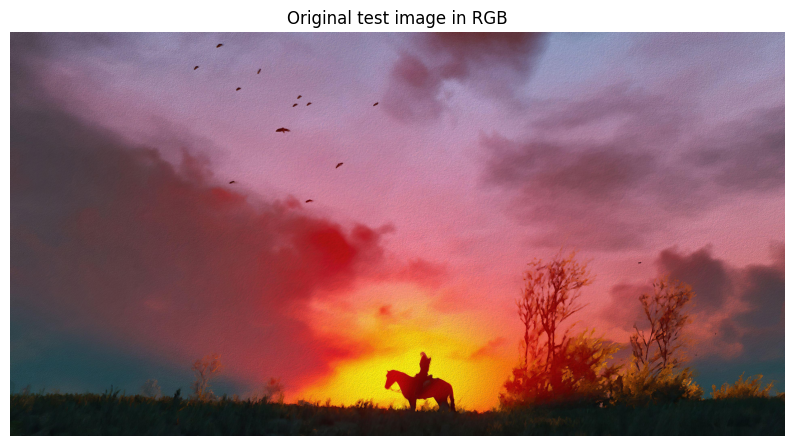

In [2]:
# Loading the test image
image_path = '../Lab_2/test_img.jpg'
test_img = cv2.imread(image_path)

# Convert BGR to RGB
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Plot the image
plt.figure(figsize=(10, 8))
plt.imshow(test_img)
plt.title('Original test image in RGB')
plt.axis('off')
plt.show()

In [3]:
def comparison_plot(original_image, processed_image, processed_title):
    # Plot the original and processed images side by side
    plt.figure(figsize=(12, 6))
    
    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original Test Image')
    plt.axis('off')
    
    # Balanced Image
    plt.subplot(1, 2, 2)
    plt.imshow(processed_image)
    plt.title(processed_title)
    plt.axis('off')
    
    plt.show()

## White Patch Algorithm

The White Patch algorithm involves selecting a group of pixels that are expected to be white. Subsequently, the image's color channels are adjusted by scaling them based on the color values within this white patch. This method aims to normalize the color balance of the image by using the assumption that certain regions should appear white, thus providing a basis for color correction.

In [4]:
def white_patch_algorithm(img):
    # Define coordinates for the white patch
    row, col = 500, 500
    
    # Extract the white patch color values
    white_patch_color_val = img[row, col, :]
    
    # Calculate scaling coefficients for white balancing
    scaling_coefficients = 255.0 / white_patch_color_val
    
    # Apply white balancing and generate balanced image
    result_img = np.zeros_like(img, dtype=np.float32)
    for channel in range(3):
        result_img[..., channel] = img[..., channel] * scaling_coefficients[channel]
    
    # Clip the values to ensure the dynamic range is preserved
    result_img = result_img / 255
    result_img[result_img > 1] = 1
    
    return result_img

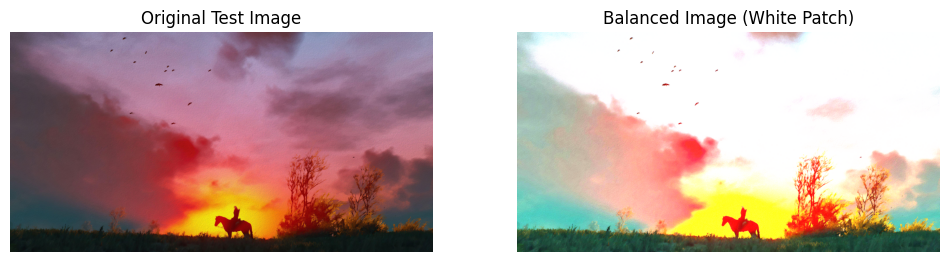

In [5]:
white_patch_img = white_patch_algorithm(test_img)

comparison_plot(test_img, white_patch_img, 'Balanced Image (White Patch)')

## Gray World Algorithm

The Gray World algorithm operates under the assumption that, on average, a scene tends to exhibit gray coloration. This method leverages this assumption to adjust the color balance of an image, aiming to produce more natural and visually pleasing results. By treating the scene as if it has an overall gray tone, the algorithm seeks to achieve a balanced color representation across the entire image.

In [6]:
def gray_world_algorithm(img):    
    # Compute the mean values for all three colour channels (red, green, blue)
    mean_r = np.mean(img[:, :, 0])
    mean_g = np.mean(img[:, :, 1])
    mean_b = np.mean(img[:, :, 2])
    
    # Compute the coefficients kr, kg, kb
    # Note: there are 3 coefficients to compute, but we only have 2 equations.
    # Therefore, you have to make an assumption, fix the value of one of the
    # coefficients and compute the remaining two
    # Hint: You can fix the coefficient of the brightest colour channel to 1.
    # Let's assume kb (coefficient for a blue channel) is 1
    kb = 1
    kr = kb / mean_b * mean_r
    kg = kb / mean_b * mean_g
    
    # Apply color balancing and generate the balanced image
    result_img = np.zeros_like(img, dtype=np.float32)
    result_img[:, :, 0] = img[:, :, 0] * kr
    result_img[:, :, 1] = img[:, :, 1] * kg
    result_img[:, :, 2] = img[:, :, 2] * kb
    
    # Clip the values to ensure the dynamic range is preserved
    result_img = np.clip(result_img, 0, 255)
    result_img = result_img.astype(np.uint8)
    
    return result_img

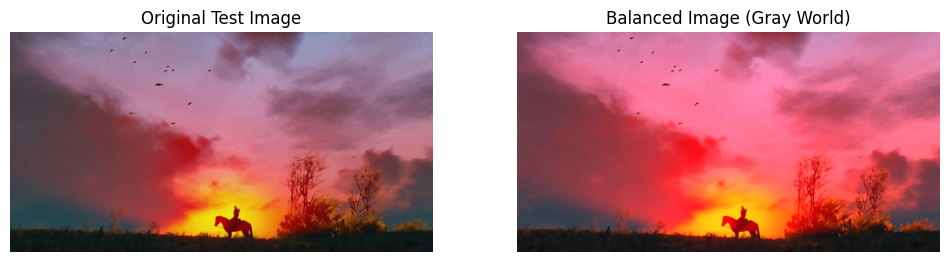

In [7]:
gray_world_img = gray_world_algorithm(test_img)

comparison_plot(test_img, gray_world_img, 'Balanced Image (Gray World)')

## Scale-by-Max Algorithm

The Scale-by-Max algorithm is a straightforward approach that involves scaling each color channel of an image by its maximum value. While simple, this method can effectively enhance the contrast and overall brightness of an image. However, it's essential to note that the Scale-by-Max algorithm is sensitive to noise and saturation levels. Excessive noise or saturation can lead to undesirable artifacts in the processed image. Therefore, caution should be exercised when applying this algorithm in scenarios with high levels of noise or saturation.

In [8]:
def scale_by_max_algorithm(img):    
    # Compute the maximum values for all three colour channels (red, green, blue)
    max_r = np.max(img[:, :, 0])
    max_g = np.max(img[:, :, 1])
    max_b = np.max(img[:, :, 2])
    
    # Apply scale-by-max balancing and generate the balanced image
    result_image = np.zeros_like(img, dtype=np.float32)
    result_image[:, :, 0] = (img[:, :, 0] / max_r) * 255
    result_image[:, :, 1] = (img[:, :, 1] / max_g) * 255
    result_image[:, :, 2] = (img[:, :, 2] / max_b) * 255
    
    # Clip the values to ensure the dynamic range is preserved
    result_image = np.clip(result_image, 0, 255)
    result_image = result_image.astype(np.uint8)

    return result_image

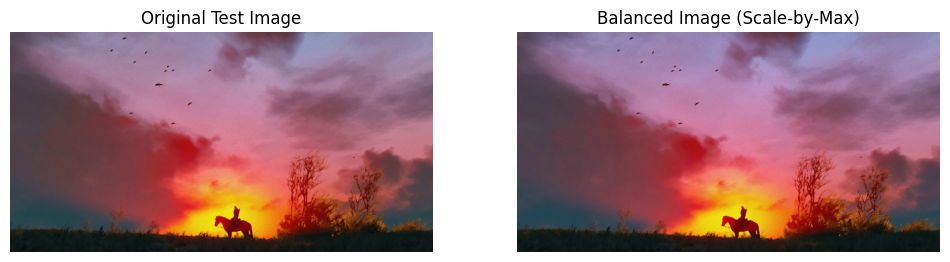

In [9]:
scale_by_max_img = scale_by_max_algorithm(test_img)

comparison_plot(test_img, scale_by_max_img, 'Balanced Image (Scale-by-Max)')